## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington
 


## Machine Learning Clusters

#### Prerequisite: 5_ml_prediction.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans

In [3]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

In [4]:
#laod  our data frame from past steps 
df = pd.read_csv(generated_data_path+'homeless_camp_closed_2023_parks_simplified_2.csv', low_memory=False)
df.head(1)

,requestsource,zipcodefmt,anonymous,park_distance_bins,close_time_days,is_county_ind,nds_an_typ,cogp_typ,access_typ,assignto_EV,assignto_HB,assignto_LSD,assignto_NC,assignto_SLA,assignto_WLA,assignto_WV
0,Self Service,90063.0,Y,2,29.0,0,Park 5 to 100 Acres,Neighborhood,Open Access,0,0,0,1,0,0,0


In [5]:
df.shape

(63064, 16)

In [6]:
df.describe()

,zipcodefmt,park_distance_bins,close_time_days,is_county_ind,assignto_EV,assignto_HB,assignto_LSD,assignto_NC,assignto_SLA,assignto_WLA,assignto_WV
count,63064.000000,63064.000000,63064.000000,63064.000000,63064.000000,63064.000000,63064.000000,63064.000000,63064.000000,63064.00000,63064.000000
mean,90465.838545,0.967414,84.468540,0.980623,0.191218,0.018854,0.006200,0.358017,0.147501,0.17062,0.107589
std,634.749417,0.954842,95.155571,0.137848,0.393264,0.136010,0.078497,0.479421,0.354607,0.37618,0.309863
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,90025.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,90048.000000,1.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,91311.000000,2.000000,125.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
max,91607.000000,4.000000,738.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [27]:
df['close_time_day_bins'] =    pd.cut(df['close_time_days'],bins=[10,50,100,200,300,1000],labels=[1,2,3,4,5])                                   

## Cluster tickets
### Logistic Regression

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [36]:
numeric_variables = df.select_dtypes(include=np.number)
x = df[list(numeric_variables.columns)]
x = x.drop('close_time_days',axis=1)
y = df['close_time_day_bins']

In [37]:
x.head(1)

,zipcodefmt,park_distance_bins,is_county_ind,assignto_EV,assignto_HB,assignto_LSD,assignto_NC,assignto_SLA,assignto_WLA,assignto_WV
0,90063.0,2,0,0,0,0,1,0,0,0


In [38]:

 X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2) 


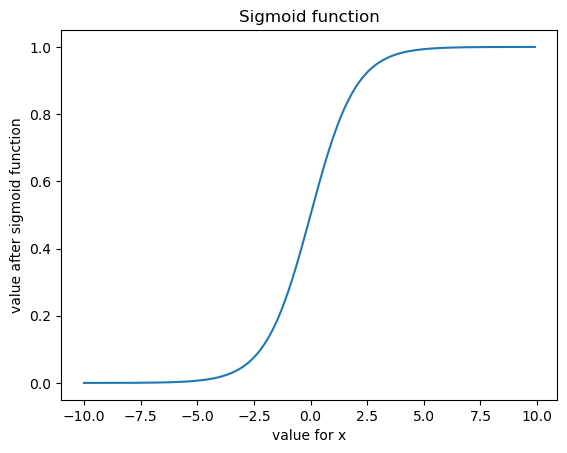

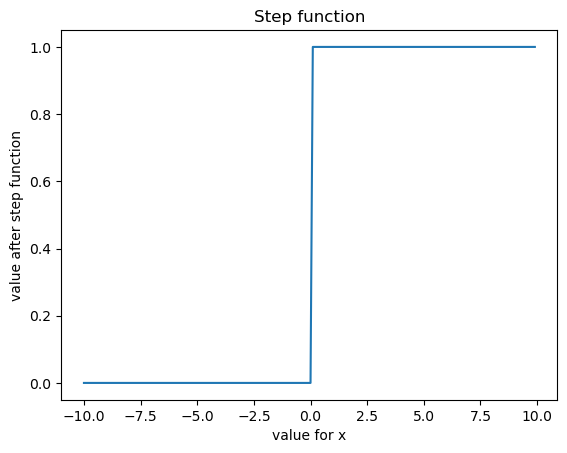

In [39]:
# sigmoid function definition
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# step function definition
def step(x, threshold = 0.5):
    return x > threshold
# input variable x
x = np.arange(-10,10,0.1)
# apply sigmoid function
y_sigmoid = list(map(sigmoid, x))
# apply step function to the output of sigmoid function
y_step = list(map(step, y_sigmoid))
# plot
plt.plot(x,y_sigmoid); plt.xlabel('value for x'); plt.ylabel('value after sigmoid function'); plt.title('Sigmoid function'); plt.show()
plt.plot(x,y_step); plt.xlabel('value for x'); plt.ylabel('value after step function'); plt.title('Step function'); plt.show()


In [40]:
X_train.head(1)

,zipcodefmt,park_distance_bins,is_county_ind,assignto_EV,assignto_HB,assignto_LSD,assignto_NC,assignto_SLA,assignto_WLA,assignto_WV
16488,90007.0,1,1,0,0,0,0,1,0,0


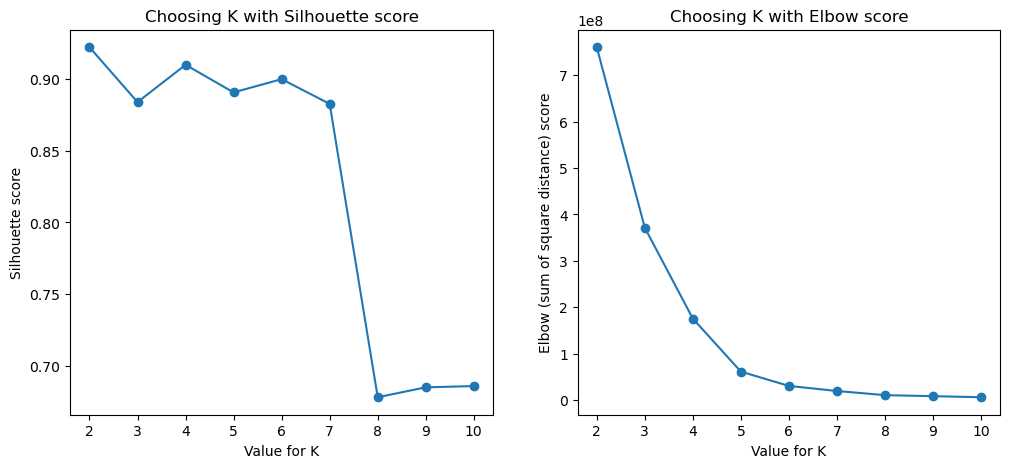

In [42]:
#method for choosing k
from sklearn.metrics import silhouette_score
x = X_train
list_ks = [k for k in range(2,11)]
inertia_list = []
silhouette_list = []
for k in list_ks:
    # Applying KMeans clustering
    kmeans = KMeans(n_clusters=k, # number of clusters
                init='k-means++',
                n_init=10, # number of times KMeans will run with different centroid seeds
                max_iter=300, # maximum number of iterations KMean will run
                tol=1e-04, # threshold value for convergence cutoff
                random_state=0)

    kmeans.fit(x)

    # Calculating inertia for the elbow method
    inertia_list.append(kmeans.inertia_)

    # Calculating silhouette score, only if k is greater than 1
    if k > 1:
        silhouette_list.append(silhouette_score(x, kmeans.labels_))

fig, axes = plt.subplots(1,2,figsize = (12,5))
axes[0].plot(list_ks, silhouette_list, marker='o')
axes[0].set_title('Choosing K with Silhouette score')
axes[0].set_xlabel('Value for K')
axes[0].set_ylabel('Silhouette score')

axes[1].plot(list_ks, inertia_list, marker='o')
axes[1].set_title('Choosing K with Elbow score')
axes[1].set_xlabel('Value for K')
axes[1].set_ylabel('Elbow (sum of square distance) score')
plt.show()

In [ ]:


# initialize KMean algorithm
km = KMeans(n_clusters=7, # number of clusters
            init='random',
            n_init=10, # number of times KMeans will run with different centroid seeds
            max_iter=300, # maximum number of iterations KMean will run
            tol=1e-04, # threshold value for convergence cutoff
            random_state=0)

# Train and predict
y_km = km.fit_predict(X_train)


In [46]:
X_train.head(1)

,zipcodefmt,park_distance_bins,is_county_ind,assignto_EV,assignto_HB,assignto_LSD,assignto_NC,assignto_SLA,assignto_WLA,assignto_WV
16488,90007.0,1,1,0,0,0,0,1,0,0


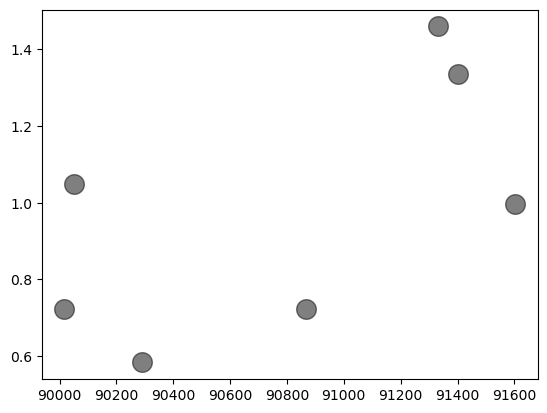

In [53]:

# Plot the result
#plt.scatter(X_train.loc[:, 'zipcodefmt'], X_train.loc[:, 'park_distance_bins'], c=y_km, s=50)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);